In [23]:
import optimiserBank as opt
import functionBank as func
import matplotlib.pyplot as plt
import importlib
importlib.reload(opt)
importlib.reload(func)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc 

Initial Population:


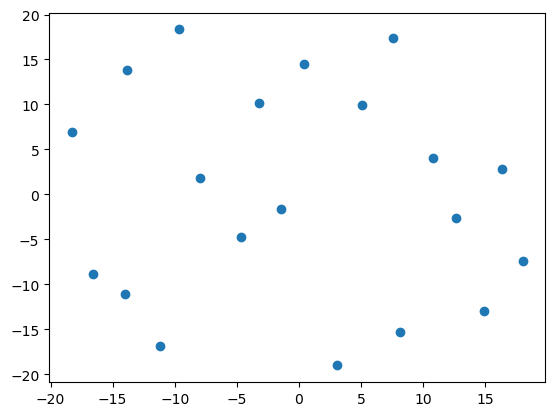

[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 90.73432035 -33.32793118]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 185.91869053 -177.55403326]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 114.04166999 -113.80367826]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[102.03327368 -72.41379685]]
[[nan nan]]
[[nan nan]]
[[ 100.08204883    5.06852536]
 [  84.00303176  -58.56716812]
 [  95.66073612  -73.45511159]
 [  90.73432035  -33.32793118]
 [ 201.8311228  -139.78679358]
 [ 100.15524925  -53.32234604]
 [ 158.07611884    7.33943445]
 [ 211.15306526 -112.18796054]
 [ 191.81477996 -159.3634656 ]
 [ 185.91869053 -177.55403326]
 [  15.31782538    8.82287765]
 [ 179.14400023 -176.14985262]
 [ 228.46179223 -124.25135854]
 [ 114.04166999 -113.80367826]
 [  55.15648603  -45.4833036 ]
 [ 133.17295164 -114.44600135]
 [ 198.69898606 -109.02662159]
 [ 102.03327368  -72.41379685]
 [ 149.30695433 -125.34143401]
 [ 131.72023135  -88.37987527]]


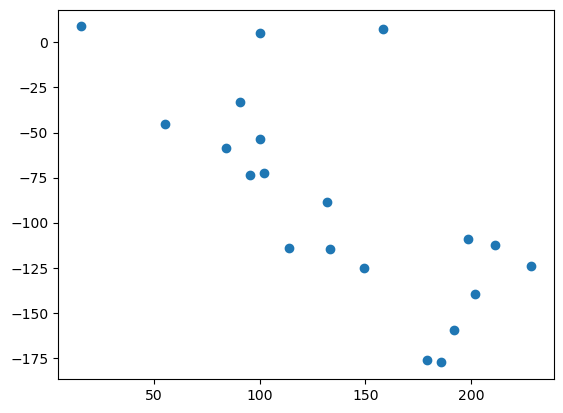

In [25]:
bounds = np.array([(-20,20), (-20,20)])
sampler = qmc.LatinHypercube(d=len(bounds))
sample = sampler.random(n=20)
initPopulation = qmc.scale(sample, bounds[:, 0], bounds[:, 1])
print('Initial Population:')
# print(initPopulation)
plt.scatter(initPopulation[:,0], initPopulation[:,1])
plt.show()

objvTargets = np.empty((0,2))

for i in range(0, 20):

    newObjvTgt = opt.MOobjective_function(initPopulation[i], func.chankongHaimes, 2)
    print(newObjvTgt)
    while np.any(np.isnan(newObjvTgt)):
        newSample = np.random.uniform(-20, high=20, size=(2,))
        newObjvTgt = opt.MOobjective_function(newSample, func.chankongHaimes, 2)

    objvTargets = np.vstack((objvTargets, newObjvTgt))

print(objvTargets)

plt.scatter(objvTargets[:,0], objvTargets[:,1])
plt.show()

In [109]:
# PSO = opt.TS_DDEO(bounds, 20, func.binhAndKorn, func.chebyshev, 2, np.array((0.5, 0.5)), useInitialPopulation=True, initialPopulation=initPopulation)
# PSO.stage1()
# PSO.stage2()

LSADE = opt.LSADE(bounds, 20, func.chankongHaimes, func.chebyshev, 2, np.array((0.5, 0.5)), useInitialPopulation=True, initialPopulation=initPopulation)
LSADE.optimizerStep()

NaN values found at indices: [ 0  1  2  4  5  6  7  9 10 11 12 13 14 15 16 17 18]
No NaN values found.
NaN values found at indices: [4]


IndexError: index 4 is out of bounds for axis 0 with size 4

In [112]:
bounds = np.array([(0,5), (0,3)])


low = bounds[:,0]
high = bounds[:,1]
print(low, high)

array = np.random.uniform(low, high, size=(2,))

print(array)

[0 0] [5 3]
[2.54045175 0.81288387]
